In [174]:
# -------------------------------------------------
# Importing libraries and dependancies

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [117]:
# ------------------------------------------------
# Reading the csv file and taking a look at the data

heart_fcr = pd.read_csv("heart_failure_clinical_records_dataset.csv")
heart_fcr.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [118]:
heart_fcr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [119]:
heart_fcr.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [120]:
heart_fcr.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [121]:
# ------------------------------------------------
# The data is cleaner than expected. Let's turn age column from float to int, lower capitals on last column, and visualise some of the data if needed

heart_fcr["age"] = heart_fcr["age"].astype("int64")
heart_fcr.columns= heart_fcr.columns.str.lower()

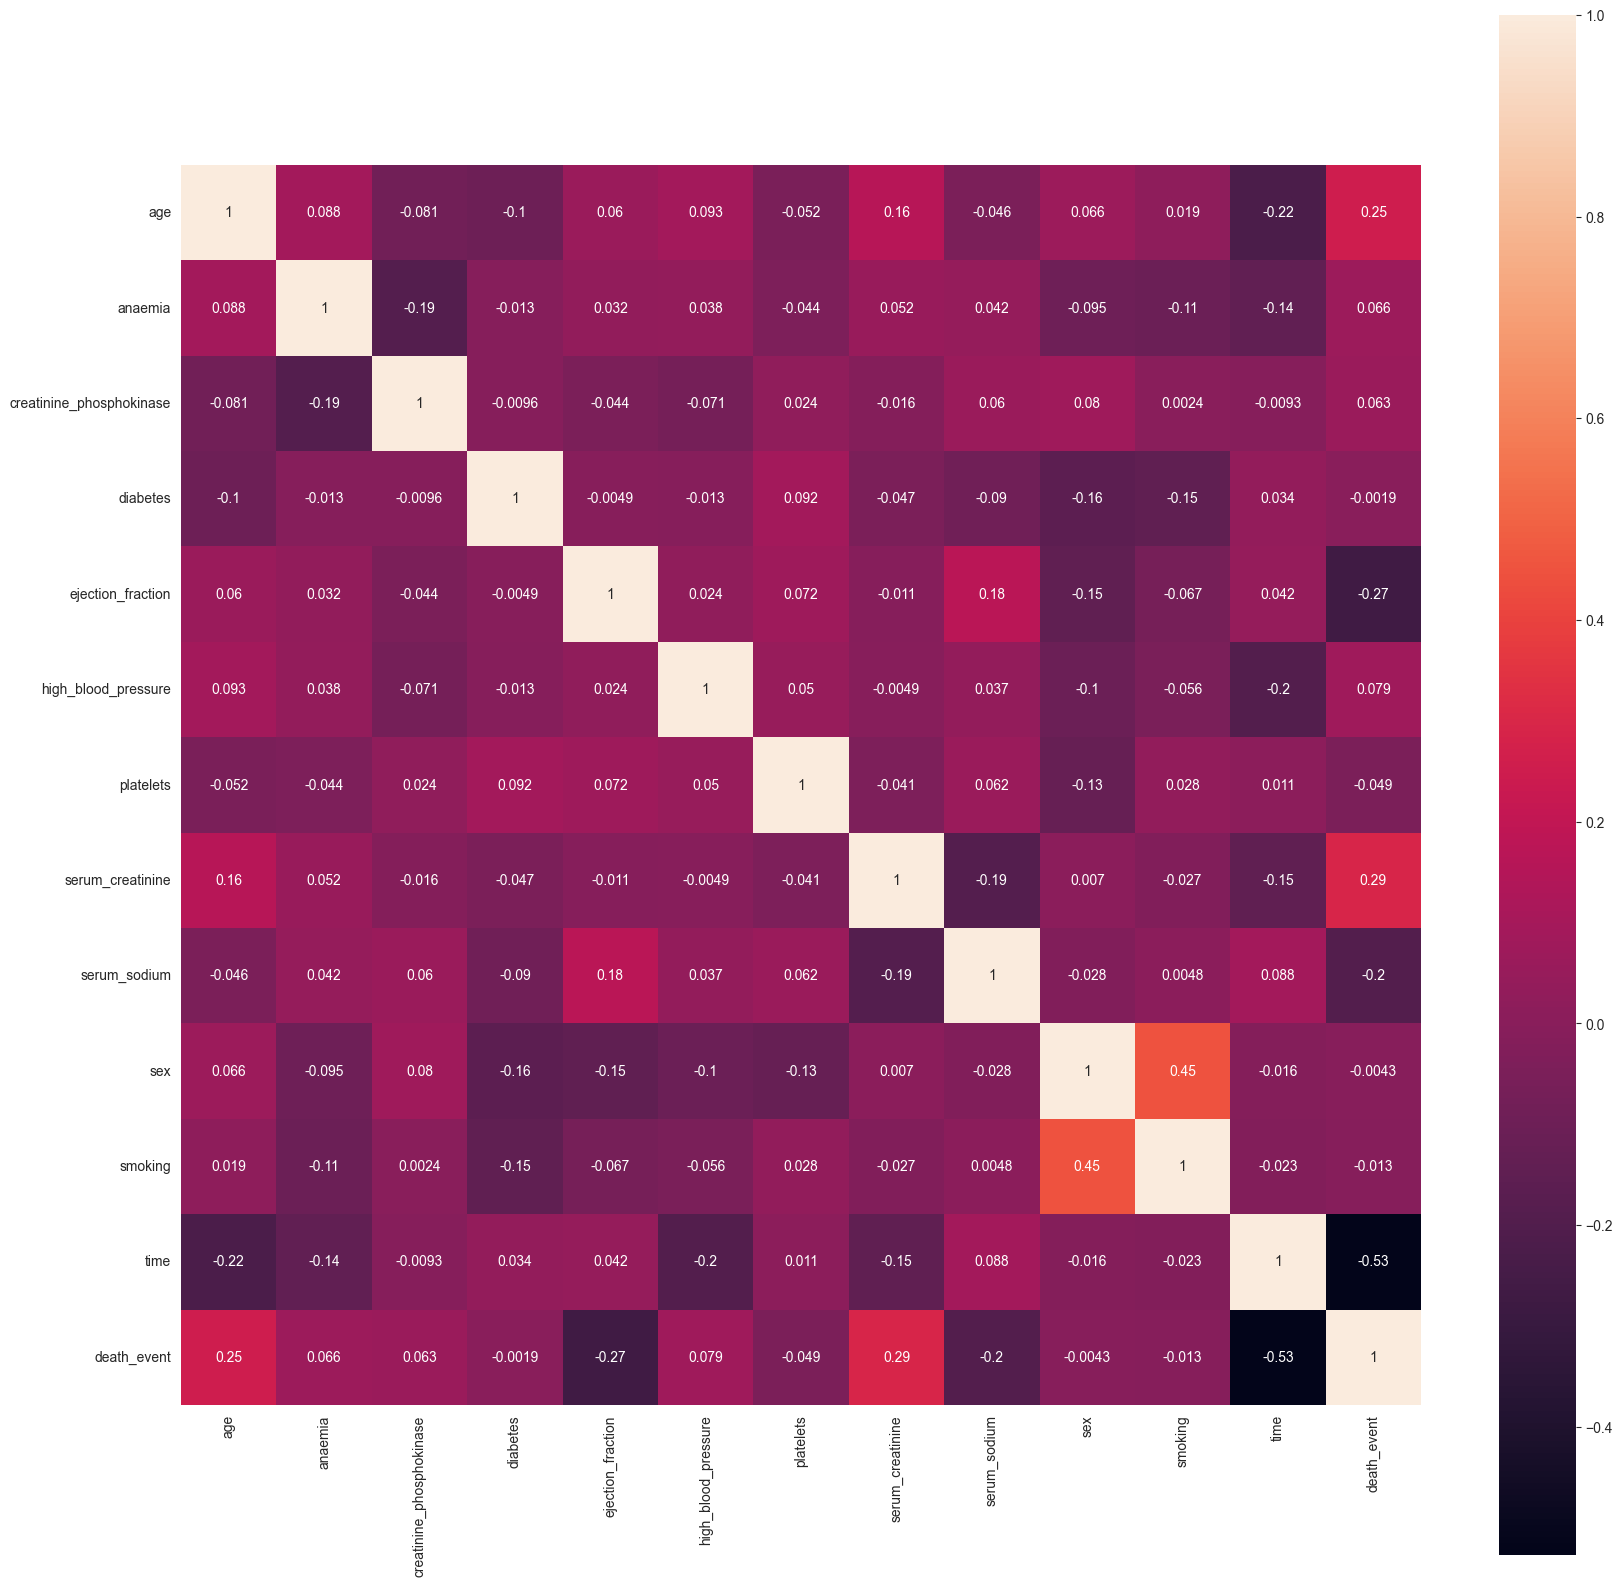

In [122]:
# Let's do a corrolation heatmap to find the relationship between our columns
plt.figure(1, figsize=(20,20) )
sns.heatmap(heart_fcr.corr(), cmap="rocket", annot=True, square=True)
plt.show()

<AxesSubplot: xlabel='age', ylabel='Count'>

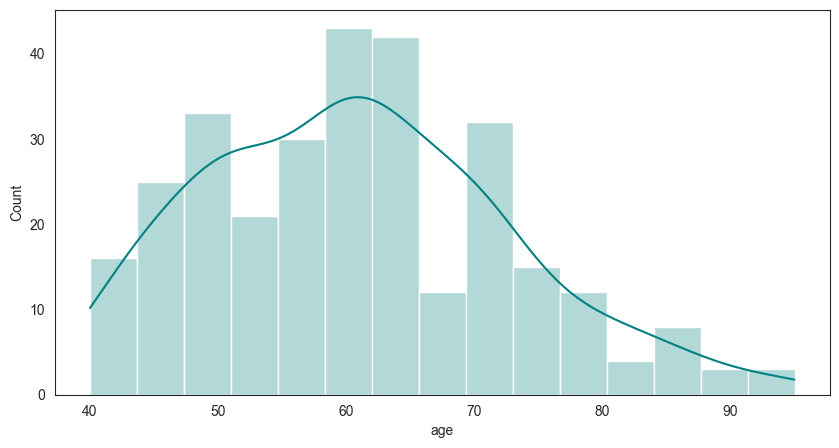

In [123]:
# Let's see the distribution of the age value as well as the death event compared to the age.
plt.figure(figsize=(10,5))
sns.set_style("white")
sns.histplot(heart_fcr["age"], bins=15, kde=True, color="teal",alpha=0.3)

<AxesSubplot: xlabel='age', ylabel='Count'>

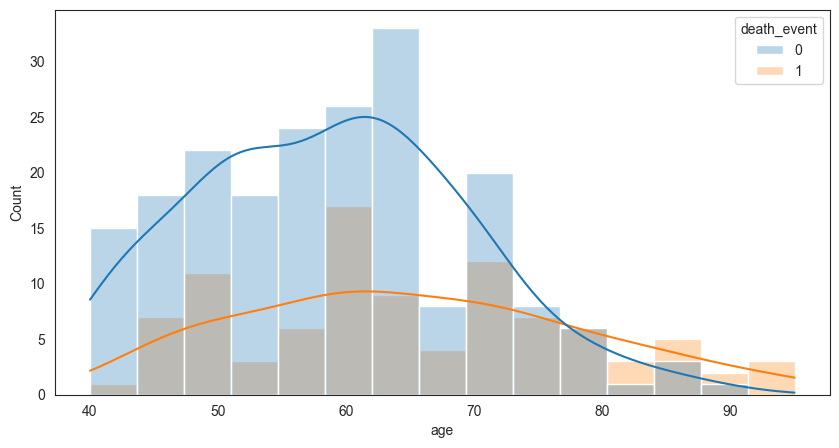

In [124]:
plt.figure(figsize=(10,5))
sns.set_style("white")
sns.histplot(heart_fcr, x="age", hue="death_event", alpha=0.3, bins=15, kde=True)

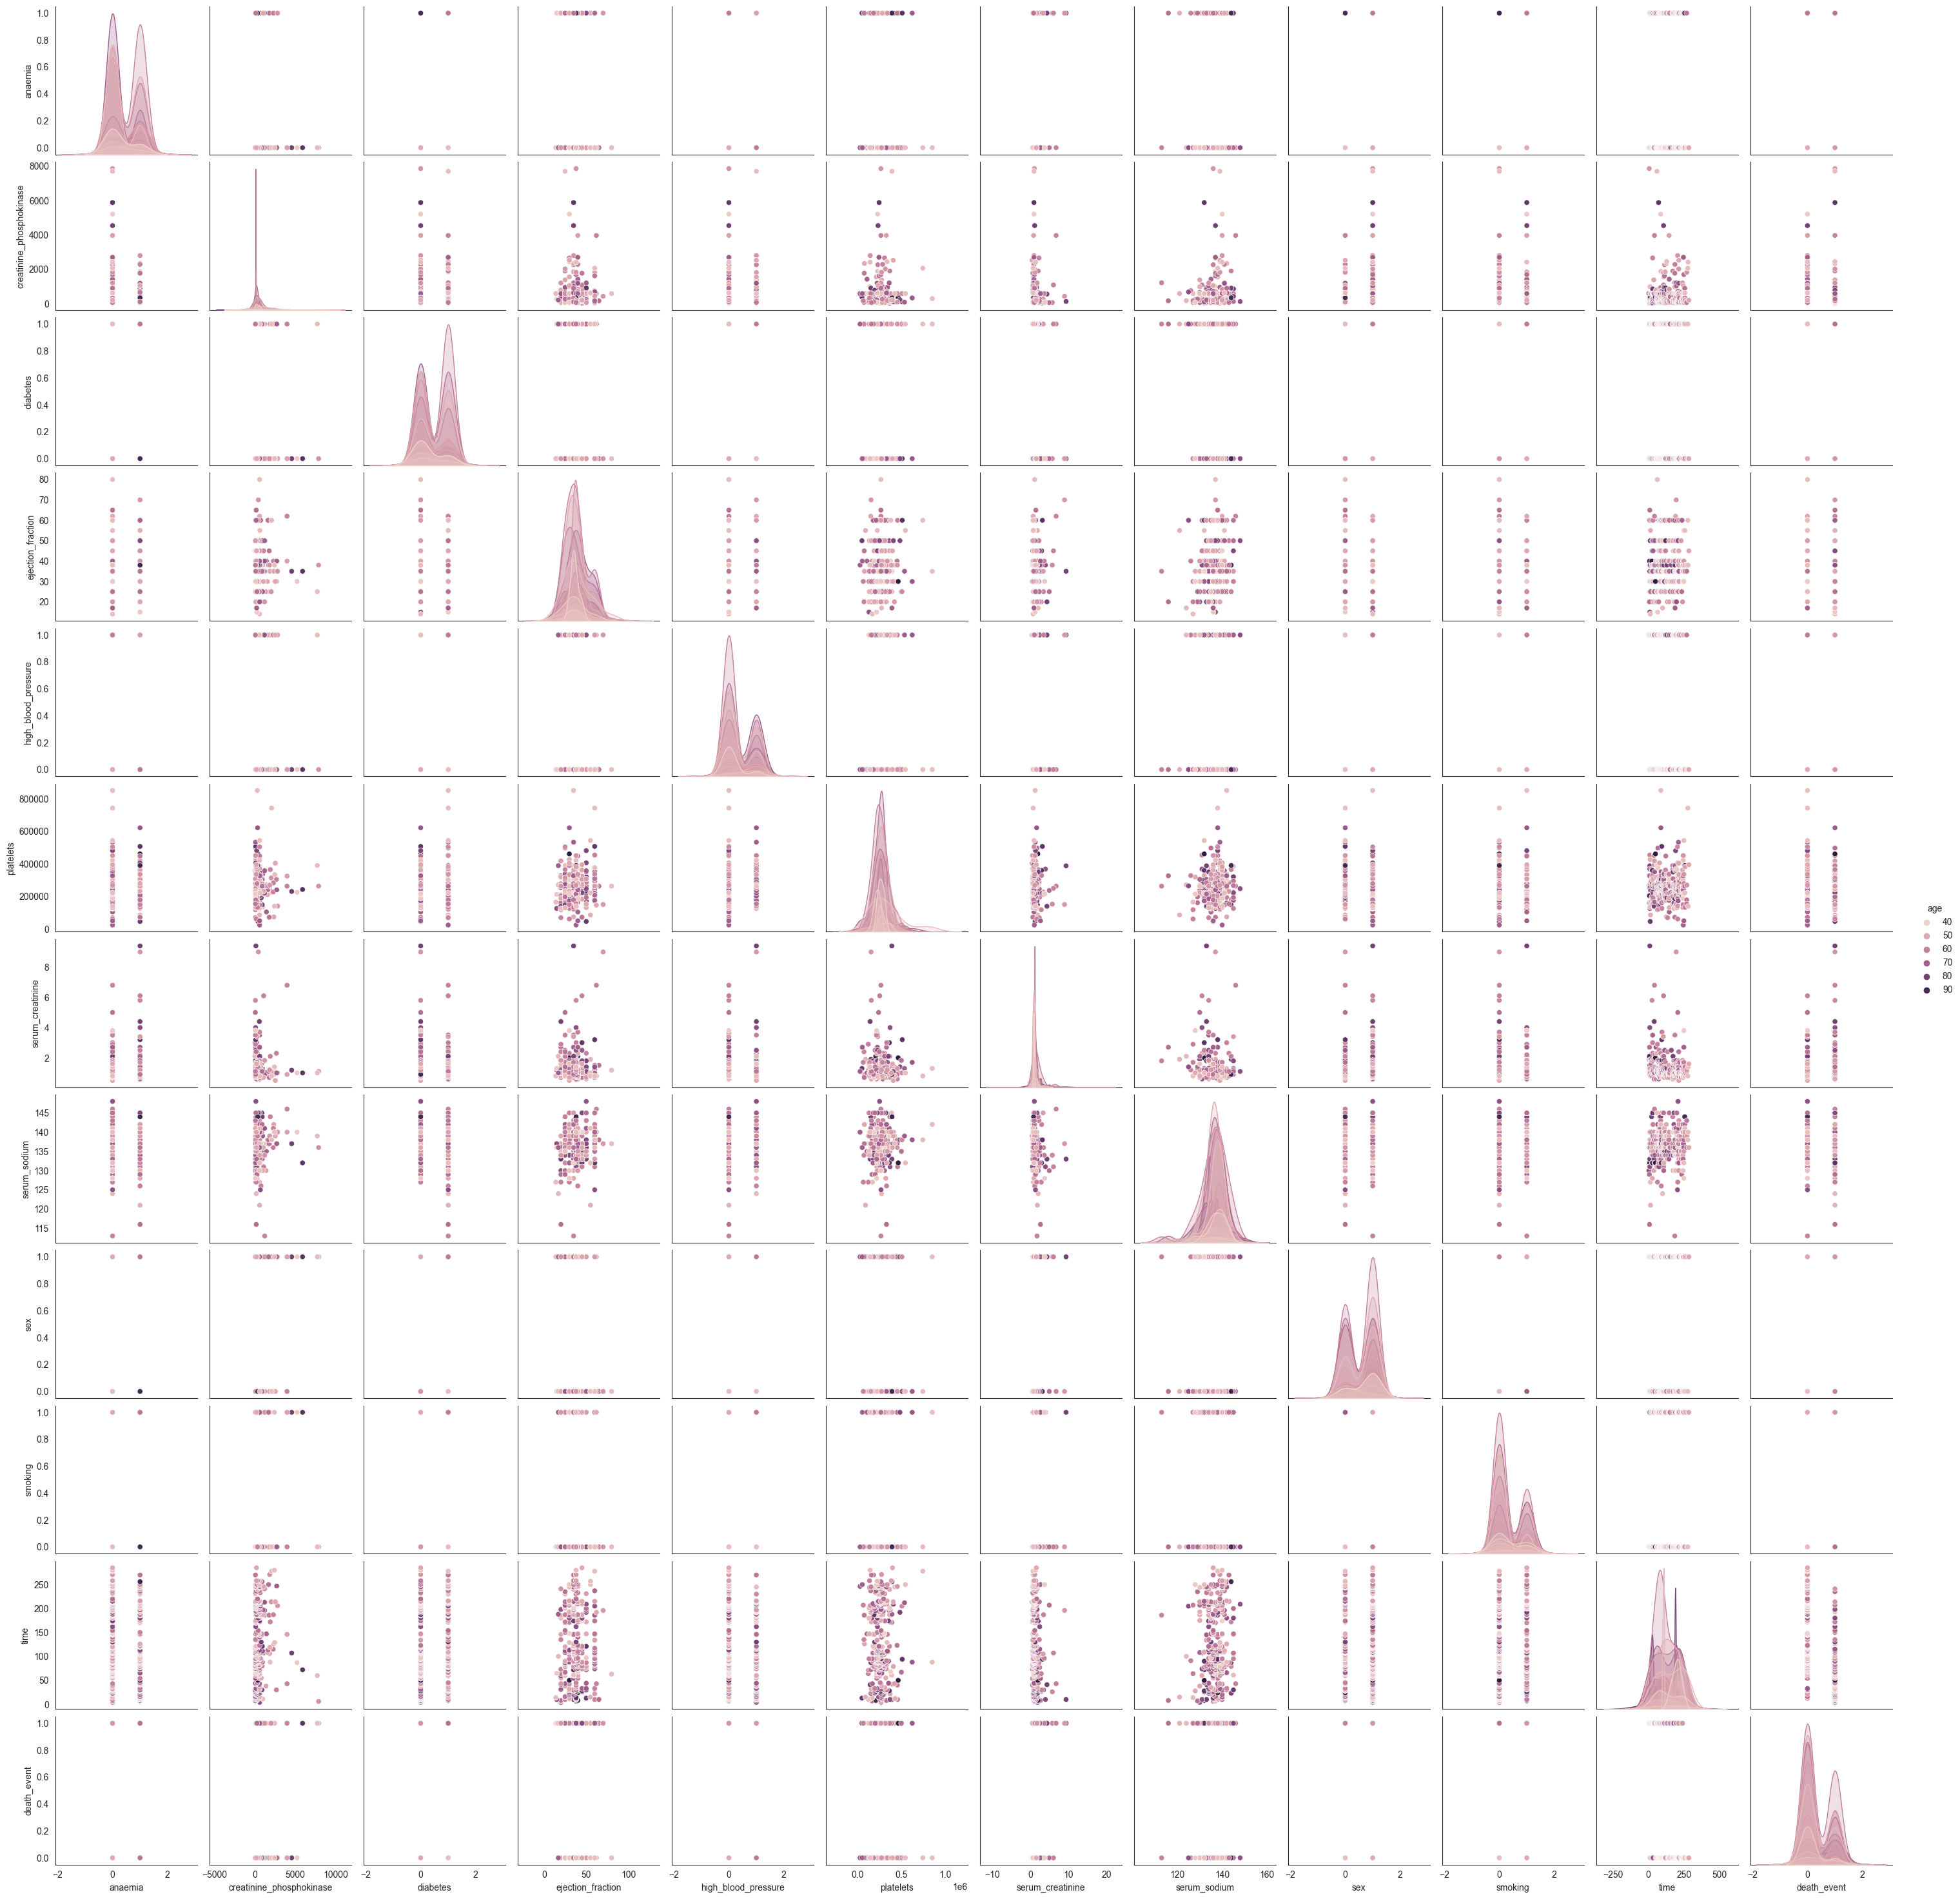

In [125]:
# Also a pairplot to maybe find other interesting relationships
sns.pairplot(heart_fcr, hue='age')

<AxesSubplot: xlabel='age', ylabel='serum_creatinine'>

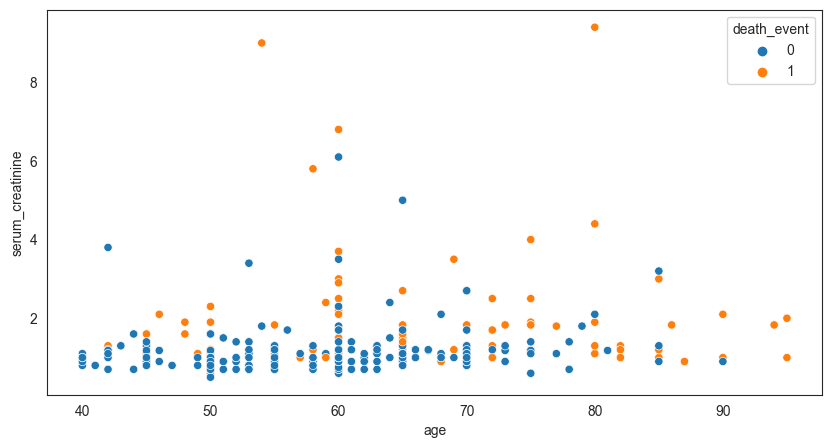

In [126]:
# We see a high correlaction between age, serum creatinine, and death event
plt.figure(figsize=(10,5))
sns.set_style("white")
sns.scatterplot(heart_fcr, x="age", y="serum_creatinine", hue="death_event")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, 

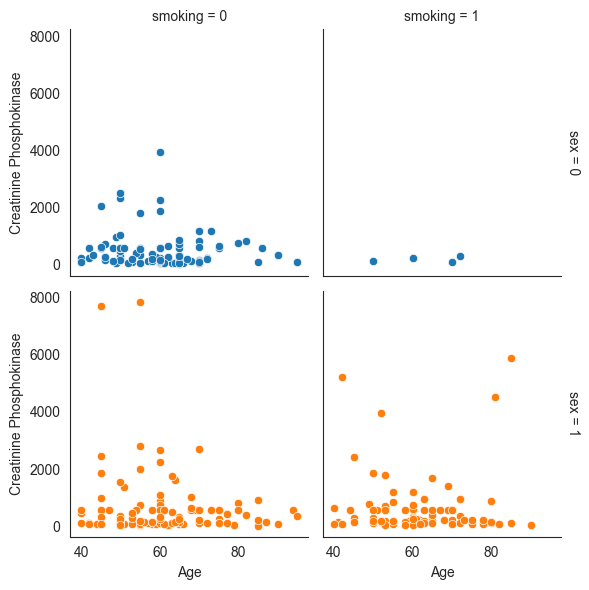

In [127]:
# As well as creatinine phosphokinase with smoking and age
with sns.axes_style("white"):
    g = sns.FacetGrid(heart_fcr, row="sex", col="smoking", margin_titles=True, hue="sex")
g.map(sns.scatterplot, "age", "creatinine_phosphokinase")
g.set_axis_labels("Age", "Creatinine Phosphokinase")


In [166]:
# ------------------------------------------------
# Splitting the data to be ready for training and testing

X = pd.get_dummies(heart_fcr.drop(['death_event'], axis=1))
y = heart_fcr['death_event']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [167]:
# ------------------------------------------------
# Building the model

model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

In [168]:
# ------------------------------------------------
# Fit, Predict, and Evaluate

model.fit(X_train, y_train, epochs=300, batch_size=32)

Epoch 1/300
8/8 [==============================] - 1s 2ms/step - loss: 954556743680.0000 - accuracy: 0.6360
Epoch 2/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6892 - accuracy: 0.6695
Epoch 3/300
8/8 [==============================] - 0s 4ms/step - loss: 0.6873 - accuracy: 0.6695
Epoch 4/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6853 - accuracy: 0.6695
Epoch 5/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6832 - accuracy: 0.6695
Epoch 6/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.6695
Epoch 7/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6796 - accuracy: 0.6695
Epoch 8/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.6695
Epoch 9/300
8/8 [==============================] - 0s 2ms/step - loss: 0.6761 - accuracy: 0.6695
Epoch 10/300
8/8 [==============================] - 0s 3ms/step - loss: 0.6744 - accuracy: 0.6695
Epoch 11/300
8/8 [

In [169]:
y_pred = model.predict(X_test)
y_pred = [0 if val < 0.5 else 1 for val in y_pred]

2/2 [==============================] - 0s 2ms/step


In [170]:
accuracy_score(y_test, y_pred)

0.7166666666666667

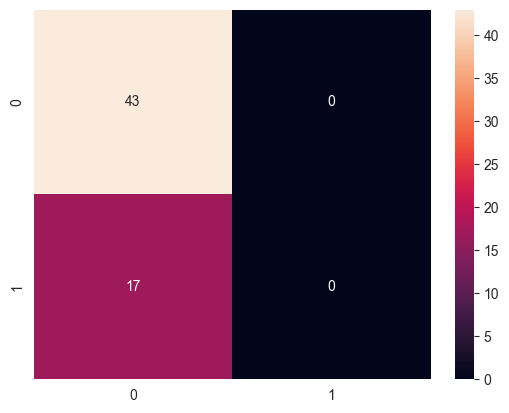

In [171]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(cm), annot=True)

In [173]:
# Saving and reloading our model

model.save('tfmodel')
del model 
model = load_model('tfmodel')

